In [1]:
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sebasti

In [2]:
sns.set_style("whitegrid")

In [3]:
paths = ["experiments/hl-2_eps-0.5_epssched-exp_lrsched-cosine/test_logs/results_all.json", 
         "experiments/hl-2_eps-0.5_epssched-exp_lrsched-cosine_randstart/test_logs/results_all.json"]

In [4]:
dfs = []
with open(paths[0], "r") as f:
    json_dict = json.load(f)
    df = pd.DataFrame(columns=["random_start_pose", "metric", "value"])
    idx = 0
    for m in ["fail_percentages", "returns", "fails"]:
        for v in json_dict[m]:
            df.loc[idx] = [False, m, v]
            idx += 1
    dfs.append(df)

with open(paths[1], "r") as f:
    json_dict = json.load(f)
    df = pd.DataFrame(columns=["random_start_pose", "metric", "value"])
    idx = 0
    for m in ["fail_percentages", "returns", "fails"]:
        for v in json_dict[m]:
            df.loc[idx] = [True, m, v]
            idx += 1
    dfs.append(df)
    
df = pd.concat(dfs)

In [5]:
df

,random_start_pose,metric,value
0,False,fail_percentages,0.05
1,False,fail_percentages,0.05
2,False,fail_percentages,0.05
3,False,fail_percentages,0.08
4,False,fail_percentages,0.06
...,...,...,...
1201,True,fails,0.00
1202,True,fails,4.00
1203,True,fails,0.00
1204,True,fails,0.00


In [6]:
def plot_best_results(df, title, save=None):
    g = sns.FacetGrid(df, col="metric", sharey="col")
    g.map(sns.barplot, "random_start_pose", "value", ci="sd", order=[False, True])
    g.fig.suptitle(title, fontsize=14)
    g.fig.subplots_adjust(top=0.8)
    if save is not None:
        g.fig.savefig(save)

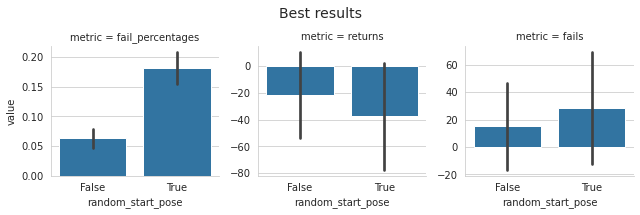

In [7]:
plot_best_results(df, "Best results", save=os.path.join("experiments", "figures", "best_results.png"))